# TRAINING KDD1998 CLASSIFIER

Customer simulation classifier to predict a boolean donation in direct marketing.

# Load Packages

In [1]:
import os
from copy import deepcopy
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'Euclid'

from sklearn.metrics import roc_curve, auc
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

Using TensorFlow backend.


# Set Seed

In [2]:
RANDOM_SEED = 777
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

# Load Data

In [3]:
data = pd.read_csv("C:/Users/jobake/Desktop/Customer_Simulation/kdd1998tuples.csv", header=None)
data.columns = ['customer', 'period', 'r0', 'f0', 'm0', 'ir0', 'if0', 'gender', 'age', 'income',
                'zip_region', 'zip_la', 'zip_lo', 'a', 'rew', 'r1', 'f1', 'm1', 'ir1', 'if1',
                'gender1', 'age1', 'income1', 'zip_region1', 'zip_la1', 'zip_lo1']
data['rew_ind'] = (data['rew'] > 0) * 1
data['age'][data['age'] == 0] = None

C:\Users\jobake\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Prepare the Data

In [4]:
customers = list(set(data['customer']))

train_samples = 100000
val_samples = 50000
test_samples = len(customers) - val_samples - train_samples

np.random.shuffle(customers)

train_customers = customers[0:train_samples]
val_customers = customers[train_samples:(train_samples + val_samples)]
test_customers = customers[(train_samples + val_samples):]

cols = ['r0', 'f0', 'm0', 'ir0', 'if0', 'gender', 'age', 'income', 'zip_region', 'a', 'rew', 'rew_ind']

train_data = data[data['customer'].isin(train_customers)][cols].fillna(0)
val_data = data[data['customer'].isin(val_customers)][cols].fillna(0)
test_data = data[data['customer'].isin(test_customers)][cols].fillna(0)

n_train = train_data.shape[0]
n_val = val_data.shape[0]
n_test = test_data.shape[0]

cols_X = ['r0', 'f0', 'm0', 'ir0', 'if0', 'gender', 'age', 'income', 'zip_region', 'a']
cols_Y = ['rew_ind']

x_train = train_data[cols_X].values.astype(np.float32)
y_train = train_data[cols_Y].values.astype(np.int32)

x_val = val_data[cols_X].values.astype(np.float32)
y_val = val_data[cols_Y].values.astype(np.int32)

x_test = test_data[cols_X].values.astype(np.float32)
y_test = test_data[cols_Y].values.astype(np.int32)

# Create Classifier NN

In [5]:
def KDDClassifier():
    model = Sequential()

    model.add(Dense(output_dim=100, input_dim=10))
    model.add(Activation("relu"))
    model.add(Dense(output_dim=100, input_dim=100))
    model.add(Activation("relu"))
    model.add(Dense(output_dim=100, input_dim=100))
    model.add(Activation("relu"))
    model.add(Dense(output_dim=100, input_dim=100))
    model.add(Activation("relu"))
    model.add(Dense(output_dim=100, input_dim=100))
    model.add(Activation("relu"))
    model.add(Dense(output_dim=2, input_dim=100))
    model.add(Activation("softmax"))

    return model

# Train the Model

In [6]:
n_epochs = 50
batch_size = 100
file_name = "C:/Users/jobake/Desktop/Customer_Simulation/kdd98_propagation_classifier_best.h5"

model = KDDClassifier()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
checkpoint = ModelCheckpoint(file_name, monitor='val_loss', save_best_only=True, save_weights_only=True)

model.fit(x_train, to_categorical(y_train), batch_size=batch_size, nb_epoch=n_epochs,
          verbose=1, callbacks=[checkpoint], validation_data=(x_val, to_categorical(y_val)))

# model.save_weights(file_name, overwrite=True)
# model.load_weights(file_name)

score = model.evaluate(x_test, to_categorical(y_test), verbose=1)
print('Test Loss: ' + str(score[0]) + '; Test Accuracy: ' + str(score[1]))

C:\Users\jobake\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=10, units=100)`
  after removing the cwd from sys.path.
C:\Users\jobake\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=100, units=100)`
  
C:\Users\jobake\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=100, units=100)`
  
C:\Users\jobake\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=100, units=100)`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\jobake\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(i

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


C:\Users\jobake\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # Remove the CWD from sys.path while we load stuff.





Train on 2200000 samples, validate on 1100000 samples
Epoch 1/50





2200000/2200000 [==============================] - 1344s 611us/step - loss: 0.3004 - acc: 0.8750 - val_loss: 0.2925 - val_acc: 0.8749
Epoch 2/50
2200000/2200000 [==============================] - 1422s 646us/step - loss: 0.2896 - acc: 0.8762 - val_loss: 0.2869 - val_acc: 0.8765
Epoch 3/50
2200000/2200000 [==============================] - 1436s 653us/step - loss: 0.2870 - acc: 0.8764 - val_loss: 0.2864 - val_acc: 0.8764
Epoch 4/50
2200000/2200000 [==============================] - 1431s 650us/step - loss: 0.2859 - acc: 0.8766 - val_loss: 0.2846 - val_acc: 0.8767
Epoch 5/50
2200000/2200000 [==============================] - 1428s 649us/step - loss: 0.2852 - acc: 0.8767 - val_loss: 0.2845 - val_acc: 0.8768
Epoch 6/50
2200000/2200000 [==============================] - 1430s 650us/step - loss: 0.2848 - acc: 0.8768 - val_loss: 0.2845 - val_acc: 0.8764
Epoch 7/50
2200000/2200000 [==============================] - 1414s 

2200000/2200000 [==============================] - 1432s 651us/step - loss: 0.2836 - acc: 0.8772 - val_loss: 0.2850 - val_acc: 0.8768
Epoch 45/50
2200000/2200000 [==============================] - 1470s 668us/step - loss: 0.2836 - acc: 0.8772 - val_loss: 0.2837 - val_acc: 0.8771
Epoch 46/50
2200000/2200000 [==============================] - 1424s 647us/step - loss: 0.2837 - acc: 0.8771 - val_loss: 0.2845 - val_acc: 0.8772
Epoch 47/50
2200000/2200000 [==============================] - 1409s 641us/step - loss: 0.2841 - acc: 0.8771 - val_loss: 0.2832 - val_acc: 0.8770
Epoch 48/50
2200000/2200000 [==============================] - 1297s 590us/step - loss: 0.2843 - acc: 0.8772 - val_loss: 0.2864 - val_acc: 0.8764
Epoch 49/50
2200000/2200000 [==============================] - 1241s 564us/step - loss: 0.2840 - acc: 0.8771 - val_loss: 0.2883 - val_acc: 0.8758
Epoch 50/50
919138/919138 [==============================] - 477s 519us/step
Test Loss: 0.2820933987229961; Test Accuracy: 0.87772238771

# Validation Function

In [7]:
def roc(y_label, y_score, name):
    fpr = dict()
    tpr = dict()
    thresholds = dict()
    roc_auc = dict()
    for i in range(2):
        fpr[i], tpr[i], thresholds[i] = roc_curve(y_label[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    ind_max = np.argmax(1 - fpr[1] + tpr[1])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_label.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot of a ROC curve for a specific class
    plt.figure(num=None, figsize=(8, 6), dpi=150, facecolor='w', edgecolor='w')
    plt.plot(fpr[1], tpr[1], label='ROC Curve (Area = %0.2f)' % roc_auc[1], color="g")

    plt.plot([fpr[1][ind_max], fpr[1][ind_max]], [fpr[1][ind_max], tpr[1][ind_max]], 'k:')
    plt.annotate(r'$\bf J$', xy=(fpr[1][ind_max] - 0.04, (fpr[1][ind_max] + tpr[1][ind_max]) / 2), color='black',
                 fontsize=20)

    plt.plot(fpr[1][ind_max], tpr[1][ind_max], marker='v', markersize=10, linestyle='None', color='brown',
             label="Decision Threshold (DT),\nMax. Youden's J Statistic")
    plt.annotate('DT: %0.2f\nTPR: %0.2f\nFPR: %0.2f' % (thresholds[1][ind_max], tpr[1][ind_max], fpr[1][ind_max]),
                 xy=(fpr[1][ind_max] + 0.015, tpr[1][ind_max] - 0.175), color='black', fontsize=20)

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.tick_params(axis='both', which='minor', labelsize=15)
    plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=20, labelpad=15)
    plt.ylabel('True Positive Rate (Sensitivity)', fontsize=20, labelpad=15)
    plt.legend(loc="lower right", fontsize=20, numpoints=1)
    plt.savefig(name, bbox_inches='tight')
    plt.show()
    plt.close()

# Validate NN Classifier

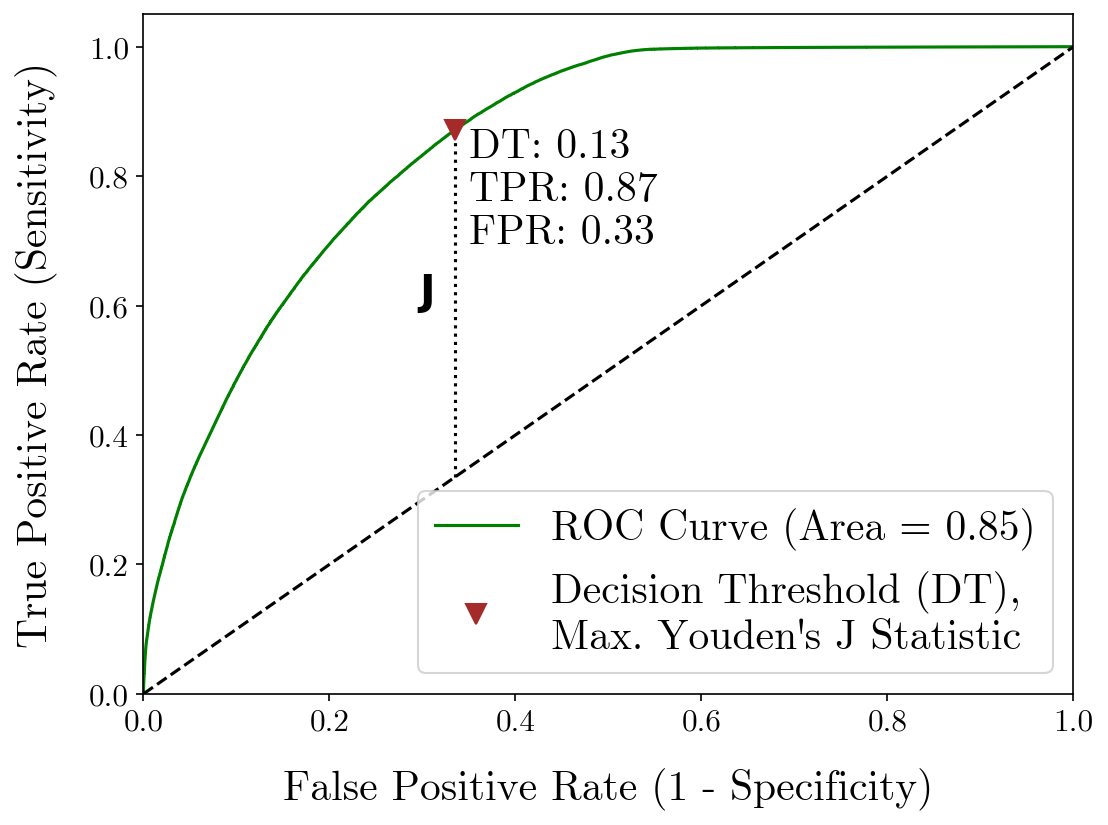

In [8]:
y_score = model.predict_proba(x_test)
roc(to_categorical(y_test), y_score, name="C:/Users/jobake/Desktop/Customer_Simulation/kdd98_propagation_classifier_roc.pdf")